# Import and pre-definitions

In [1]:
import os
MAIN_PATH = r'/home/luis-felipe'
DATA_PATH = r'/data'
PATH_MODELS = os.path.join(MAIN_PATH,'torch_models')
FIGS_PATH = os.path.join(MAIN_PATH,'results','figs')

In [2]:
import torch
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Define o computador utilizado como cuda (gpu) se existir ou cpu caso contrário
print(torch.cuda.is_available())
dev = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
#torch.set_default_dtype(torch.float64)
torch.manual_seed(42)
np.random.seed(42)

True


In [4]:
import sys
sys.path.insert(1, '..')
sys.path.insert(1, '../..')

import models
from utils import measures,metrics
from data_utils import upload_logits,split_data
import post_hoc

# Evaluate logits

In [5]:
METRIC = metrics.AURC#lambda x,y: 1-metrics.AUROC(x,y)#metrics.AURC
DATASET = 'ImageNet'

In [7]:
methods = {'MSP':measures.MSP,
           'MaxLogit':measures.max_logit}

In [8]:
d_baseline = {''}


p_list = {m:{} for m in methods.keys()}

acc = {}
acc_test = {}

In [6]:
for MODEL_ARC in models_list:
    print(MODEL_ARC)
    if 'quantized' in MODEL_ARC:
        print('quantized - skip')
        continue
    with torch.no_grad():
        try : 
            upload_logits(MODEL_ARC,DATASET,PATH_MODELS, split = 'sketch', device = dev,data_dir = DATA_PATH, batch_size = 50)
        except: 
            print('cant find')
            continue
        

IndentationError: expected an indented block after 'with' statement on line 6 (2395127872.py, line 7)

In [10]:
models_list = models.list_models()#['resnet50','vgg16','alexnet','efficientnetv2_xl','efficientnet_b3','convnext_base','resnet18','vit_l_16_384','vit_b_32_sam','wide_resnet50_2','maxvit_t']
VAL_SIZE = 0.1
for MODEL_ARC in models_list:
    print(MODEL_ARC)
    #if MODEL_ARC in df['model'].values:
    #    print('ja foi')
    #    continue
    if 'quantized' in MODEL_ARC:
        print('quantized - skip')
        continue
    with torch.no_grad():
        try : 
            logits_val,labels_val,logits_test,labels_test = split_data.split_logits(*upload_logits(MODEL_ARC,DATASET,PATH_MODELS, 
                            split = 'test', device = dev),VAL_SIZE)
            logits_v2,labels_v2 = upload_logits(MODEL_ARC,DATASET,PATH_MODELS, 
                                split = 'v2', device = dev,data_dir = DATA_PATH, batch_size = 30)
            risk_v2 = measures.wrong_class(logits_v2,labels_v2).float()
        except: 
            print('cant find')
            continue
    logits_val = pNormSoftmax.centralize(logits_val)
    logits_test = pNormSoftmax.centralize(logits_test)
    logits_v2 = pNormSoftmax.centralize(logits_v2)
    risk_val = measures.wrong_class(logits_val,labels_val).float()
    risk_test = measures.wrong_class(logits_test,labels_test).float()
    risk_v2 = measures.wrong_class(logits_v2,labels_v2).float()
    acc[MODEL_ARC] = (1-risk_v2.mean().item())
    acc_test[MODEL_ARC] = (1-risk_test.mean().item())
    for m,method in methods.items():
        if method == 'MaxLogit' or method == 'LogitMargin': T_range = [1]
        else: T_range = optimize.T_range
        p,beta = optimize.p_and_beta(logits_val,risk_val,method,METRIC,T_range = T_range)
        p_list[m][MODEL_ARC] = p.item()
        T = optimize.T(logits_val,risk_val,method,METRIC)
        T_nll = optimize.T_fromloss(logits_val,labels_val,torch.nn.CrossEntropyLoss())
    #T_nll = pNormSoftmax.optimize.T_fromloss(logits_val,labels_val,torch.nn.CrossEntropyLoss())
        d_auroc[m][MODEL_ARC] = metrics.AUROC(risk_v2,method(logits_v2))
        d_auroc_test[m][MODEL_ARC] = metrics.AUROC(risk_test,method(logits_test))
        d_auroc_T[m][MODEL_ARC] = metrics.AUROC(risk_v2,method(logits_v2.div(T)))
        d_auroc_T_nll[m][MODEL_ARC] = metrics.AUROC(risk_v2,method(logits_v2.div(T_nll)))
        d_auroc_p[m][MODEL_ARC] = metrics.AUROC(risk_v2,method(pNormSoftmax.pNormSoftmax(logits_v2,p,beta,out='logits')))
        d_auroc_p_test[m][MODEL_ARC] = metrics.AUROC(risk_test,method(pNormSoftmax.pNormSoftmax(logits_test,p,beta,out='logits')))

        d_naurc[m][MODEL_ARC] = metrics.N_AURC(risk_v2,method(logits_v2))
        d_naurc_test[m][MODEL_ARC] = metrics.N_AURC(risk_test,method(logits_test))
        d_naurc_T[m][MODEL_ARC] = metrics.N_AURC(risk_v2,method(logits_v2.div(T)))
        d_naurc_T_nll[m][MODEL_ARC] = metrics.N_AURC(risk_v2,method(logits_v2.div(T_nll)))
        d_naurc_p[m][MODEL_ARC] = metrics.N_AURC(risk_v2,method(pNormSoftmax.pNormSoftmax(logits_v2,p,beta,out='logits')))
        d_naurc_p_test[m][MODEL_ARC] = metrics.N_AURC(risk_test,method(pNormSoftmax.pNormSoftmax(logits_test,p,beta,out='logits')))
    #d_aurc[MODEL_ARC] = metrics.AURC(risk_v2,measures.MSP(logits_v2.div(T_nll)))
    

    #p,beta = pNormSoftmax.optimize.p_and_beta(logits_val,risk_val,AURC)

    #d_auroc[MODEL_ARC] = metrics.AUROC(risk_v2,measures.MSP(logits_v2.div(T_nll)))
models_list = list(acc.keys())

alexnet
convnext_base
convnext_large
convnext_small
convnext_tiny
deeplabv3_mobilenet_v3_large
cant find
deeplabv3_resnet101
cant find
deeplabv3_resnet50
cant find
densenet121
densenet161
densenet169
densenet201
efficientnet_b0
efficientnet_b1
efficientnet_b2
efficientnet_b3
efficientnet_b4
efficientnet_b5
efficientnet_b6
efficientnet_b7
efficientnet_v2_l
efficientnet_v2_m
efficientnet_v2_s
fasterrcnn_mobilenet_v3_large_320_fpn
cant find
fasterrcnn_mobilenet_v3_large_fpn
cant find
fasterrcnn_resnet50_fpn
cant find
fasterrcnn_resnet50_fpn_v2
cant find
fcn_resnet101
cant find
fcn_resnet50
cant find
fcos_resnet50_fpn
cant find
googlenet
inception_v3
keypointrcnn_resnet50_fpn
cant find
lraspp_mobilenet_v3_large
cant find
maskrcnn_resnet50_fpn
cant find
maskrcnn_resnet50_fpn_v2
cant find
maxvit_t
mc3_18
cant find
mnasnet0_5
mnasnet0_75
mnasnet1_0
mnasnet1_3
mobilenet_v2
mobilenet_v3_large
mobilenet_v3_small
mvit_v1_b
cant find
mvit_v2_s
cant find
quantized_googlenet
quantized - skip
quantiz

In [87]:
import pickle
RESULTS_PATH = os.path.join(MAIN_PATH,'results')
with open(os.path.join(RESULTS_PATH,'c_results','naurc_c'), 'rb') as f:
    naurc_c = pickle.load(f)
with open(os.path.join(RESULTS_PATH,'c_results','acc_c'), 'rb') as f:
    acc_c = pickle.load(f)


In [118]:
naurc_c_models = naurc_c['model']['spatter'][1]
naurc_c_models

['resnet50', 'wide_resnet50_2', 'alexnet', 'convnext_base']

In [108]:
accs_c = []
for n,i in acc_c.items():
    if n in ['speckle_noise', 'spatter', 'saturate','glass_blur']: continue
    accs_c.append(list(i.values()))
accs_c = np.array(accs_c)#.reshape(-1)

In [111]:
baseline_c = []
for n,i in naurc_c['MSP'].items():
    if n in ['speckle_noise', 'spatter', 'saturate','glass_blur']: continue
    baseline_c.append(list(i.values()))
baseline_c = np.array(baseline_c)#.reshape(-1)
naurc_p_c = []
for n,i in naurc_c['MaxLogit-pNorm'].items():
    if n in ['speckle_noise', 'spatter', 'saturate','glass_blur']: continue
    naurc_p_c.append(list(i.values()))
naurc_p_c = np.array(naurc_p_c)#.reshape(-1)
naurc_p_c = np.minimum(naurc_p_c,baseline_c)
gains_c = baseline_c-naurc_p_c


In [47]:
d_optimal_naurc = {m:1 for m in models_list}
for method in methods:
    for m in models_list:
        for t,d in {'base':d_naurc,'p':d_naurc_p,'T':d_naurc_T}.items():
            if d[method][m] < d_optimal_naurc[m]:
                d_optimal_naurc[m] = d[method][m]

d_optimal_naurc_test = {m:1 for m in models_list}
for method in methods:
    for m in models_list:
        for t,d in {'base':d_naurc_test,'p':d_naurc_p_test}.items():
            if d[method][m] < d_optimal_naurc_test[m]:
                d_optimal_naurc_test[m] = d[method][m]

d_optimal_auroc = {m:0 for m in models_list}
for method in methods:
    for m in models_list:
        for t,d in {'base':d_auroc,'p':d_auroc_p,'T':d_auroc_T}.items():
            if d[method][m] > d_optimal_auroc[m]:
                d_optimal_auroc[m] = d[method][m]
baseline_naurc = d_naurc['MSP']
baseline_naurc_test = d_naurc_test['MSP']
baseline_auroc = d_auroc['MSP']

In [48]:
for m in models_list:
    if p_list['MSP'][m] == 0: 
        p_list['MaxLogit'][m] = 0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


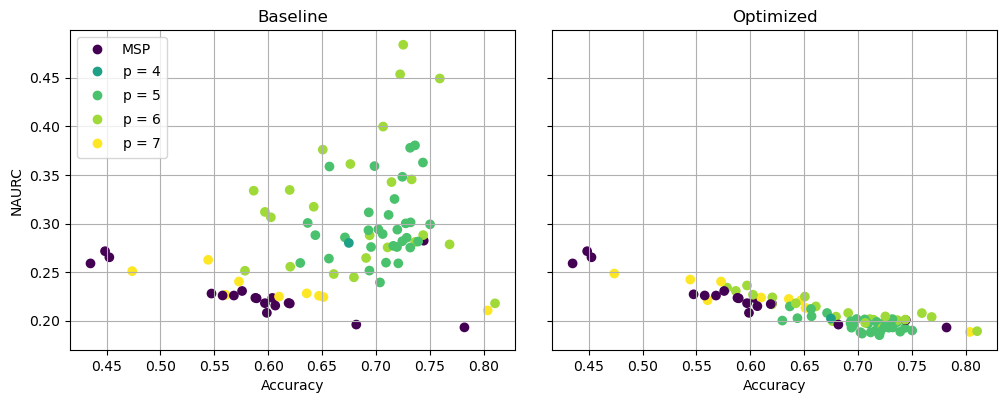

In [49]:
fig,axes = plt.subplots(1,2,figsize = (10,4), sharey = True)
fig.tight_layout()
scatter = axes[0].scatter(np.array(list(acc.values())),np.array(list(baseline_naurc.values())),c = list(p_list['MaxLogit'].values()))
axes[1].scatter(acc.values(),d_optimal_naurc.values(),c = list(p_list['MaxLogit'].values()))
axes[0].set_title('Baseline')
axes[1].set_title('Optimized')
axes[0].set_ylabel('NAURC')
for ax in axes:
    ax.grid()
    ax.set_xlabel('Accuracy')
axes[0].legend()
l = scatter.legend_elements()[1]
for n,i in enumerate(l):
    l[n] = 'p = '+i 
l[0] = 'MSP'
legend1 = axes[0].legend(scatter.legend_elements()[0], l)
plt.subplots_adjust(bottom=0.15)
plt.savefig(os.path.join(FIGS_PATH,'NAURC_v2.pdf'),format = 'pdf', bbox_inches='tight', transparent = True)

In [50]:
from scipy.stats import spearmanr
spearmanr(np.array(list(acc.values())),np.array(list(d_optimal_naurc.values())))

SignificanceResult(statistic=-0.8295374584365603, pvalue=1.8851277051344241e-22)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


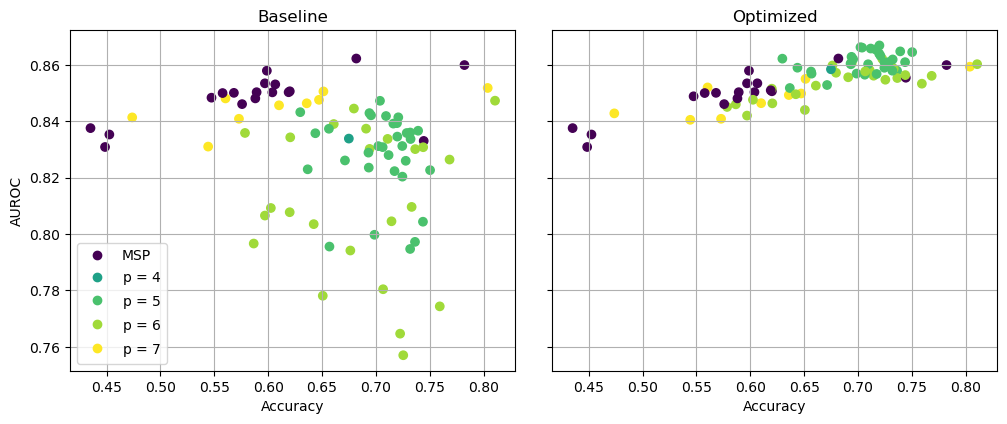

In [51]:
fig,axes = plt.subplots(1,2,figsize = (10,4), sharey = True)
fig.tight_layout()
scatter = axes[0].scatter(np.array(list(acc.values())),np.array(list(baseline_auroc.values())),c = list(p_list['MaxLogit'].values()))
axes[1].scatter(acc.values(),d_optimal_auroc.values(),c = list(p_list['MaxLogit'].values()))
axes[0].set_title('Baseline')
axes[1].set_title('Optimized')
axes[0].set_ylabel('AUROC')
for ax in axes:
    ax.grid()
    ax.set_xlabel('Accuracy')
axes[0].legend()
l = scatter.legend_elements()[1]
for n,i in enumerate(l):
    l[n] = 'p = '+i 
l[0] = 'MSP'
legend1 = axes[0].legend(scatter.legend_elements()[0], l)

plt.savefig(os.path.join(FIGS_PATH,'AUROC_v2.pdf'),format = 'pdf', bbox_inches='tight', transparent = True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


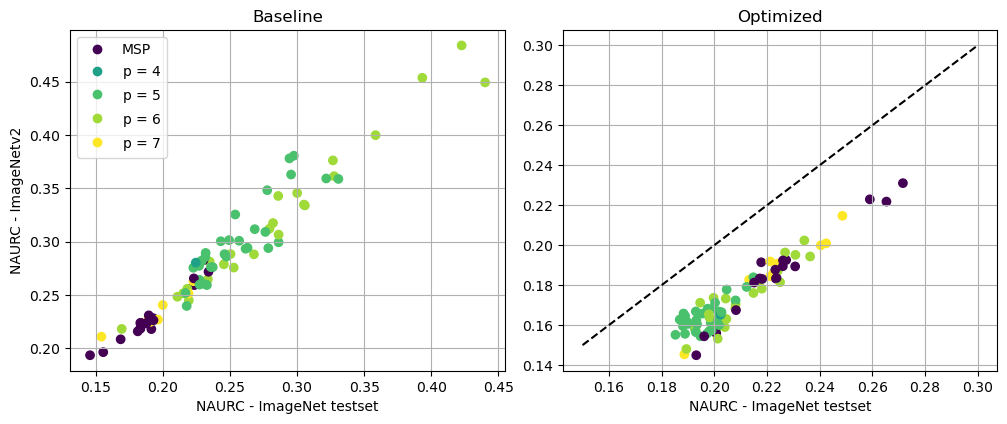

In [172]:
fig,axes = plt.subplots(1,2,figsize = (10,4), sharey = False)
fig.tight_layout()
scatter = axes[0].scatter(np.array(list(d_naurc_test['MSP'].values())),np.array(list(d_naurc['MSP'].values())),c = list(p_list['MaxLogit'].values()))
axes[1].scatter(d_optimal_naurc.values(),d_optimal_naurc_test.values(),c = list(p_list['MaxLogit'].values()))
axes[0].set_title('Baseline')
axes[1].plot([0.15,0.3],[0.15,0.3],'k--')
axes[1].set_title('Optimized')
axes[0].set_ylabel('NAURC - ImageNetv2')
for ax in axes:
    ax.grid()
    ax.set_xlabel('NAURC - ImageNet testset')
axes[0].legend()
l = scatter.legend_elements()[1]
for n,i in enumerate(l):
    l[n] = 'p = '+i 
l[0] = 'MSP'
legend1 = axes[0].legend(scatter.legend_elements()[0], l)

plt.savefig(os.path.join(FIGS_PATH,'NAURC_consistency.pdf'),format = 'pdf', bbox_inches='tight', transparent = True)
plt.show()

In [216]:
np.array(list(baseline_naurc_test.values()))[m]

array([0.32177473, 0.35852895, 0.22344873, 0.29767388])

In [222]:
(np.minimum(baseline_c,naurc_p_c)).mean(0)

array([[0.19546281, 0.19038416, 0.31461697, 0.18316594],
       [0.22028092, 0.20785175, 0.39196461, 0.1960262 ],
       [0.24899704, 0.22799239, 0.46485549, 0.21109266],
       [0.30480443, 0.27082549, 0.55019605, 0.24482836],
       [0.39041319, 0.3489603 , 0.62571644, 0.3145317 ]])

In [223]:
np.array(list(baseline_naurc_test.values()))[m]

array([0.32177473, 0.35852895, 0.22344873, 0.29767388])

In [228]:
m

[49, 79, 0, 1]

In [231]:
(np.minimum(baseline_c,naurc_p_c)).mean(0)[4]

array([0.39041319, 0.3489603 , 0.62571644, 0.3145317 ])

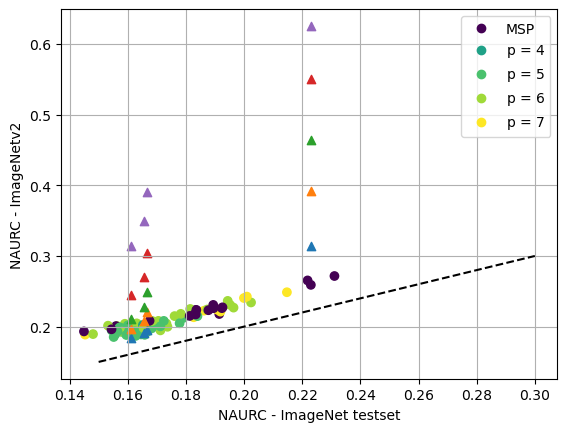

In [232]:
plt.scatter(d_optimal_naurc_test.values(),d_optimal_naurc.values(),c = list(p_list['MaxLogit'].values()))
plt.plot([0.15,0.3],[0.15,0.3],'k--')
for l in range(5):
    plt.scatter(np.array(list(d_optimal_naurc_test.values()))[m],(np.minimum(baseline_c,naurc_p_c)).mean(0)[l],marker = '^',label = l+1)

plt.ylabel('NAURC - ImageNetv2')
plt.xlabel('NAURC - ImageNet testset')
plt.legend()
plt.grid()
l = scatter.legend_elements()[1]
for n,i in enumerate(l):
    l[n] = 'p = '+i 
l[0] = 'MSP'
legend1 = plt.legend(scatter.legend_elements()[0], l)

plt.savefig(os.path.join(FIGS_PATH,'NAURC_consistency.pdf'),format = 'pdf', bbox_inches='tight', transparent = True)
plt.show()

In [165]:
naurc_p_c.shape

(15, 5, 4)

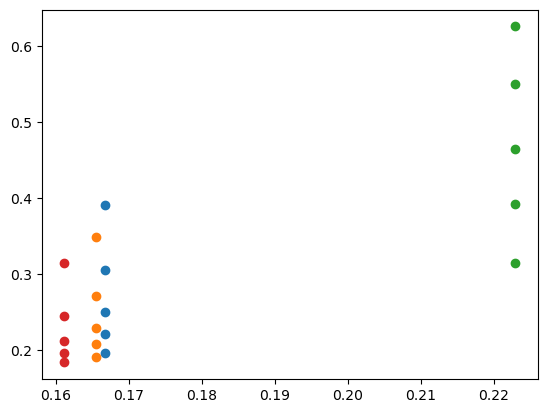

In [170]:
for i,m in enumerate(naurc_c_models):
    plt.scatter(d_optimal_naurc_test[m]*np.ones_like(naurc_p_c.mean(0).T[i]),naurc_p_c.mean(0).T[i])

In [179]:
accs_c.shape

(15, 5, 4)

In [180]:
naurc_p_c.shape

(15, 5, 4)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


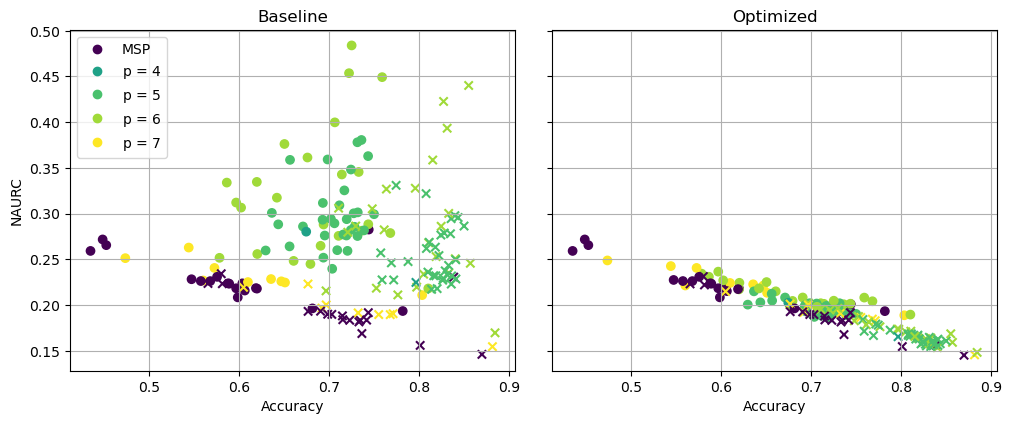

In [239]:
fig,axes = plt.subplots(1,2,figsize = (10,4), sharey = True)
fig.tight_layout()
scatter = axes[0].scatter(np.array(list(acc.values())),np.array(list(baseline_naurc.values())),c = list(p_list['MaxLogit'].values()))
axes[0].scatter(acc_test.values(),d_naurc_test['MSP'].values(),c = list(p_list['MaxLogit'].values()),marker = 'x')
axes[1].scatter(acc.values(),d_optimal_naurc.values(),c = list(p_list['MaxLogit'].values()))
axes[1].scatter(acc_test.values(),d_optimal_naurc_test.values(),c = list(p_list['MaxLogit'].values()),marker = 'x')
#for i in range(5):
#    axes[1].scatter(accs_c.mean(0)[i],naurc_p_c.mean(0)[i],marker = '^',label = i)
#    axes[0].scatter(accs_c.mean(0)[i],baseline_c.mean(0)[i],marker = '^',label = i)
axes[0].set_title('Baseline')
axes[1].set_title('Optimized')
axes[0].set_ylabel('NAURC')
for ax in axes:
    ax.grid()
    ax.set_xlabel('Accuracy')
axes[0].legend()
l = scatter.legend_elements()[1]
for n,i in enumerate(l):
    l[n] = 'p = '+i 
l[0] = 'MSP'
legend1 = axes[0].legend(scatter.legend_elements()[0], l)

plt.savefig(os.path.join(FIGS_PATH,'AUROC_v2.pdf'),format = 'pdf', bbox_inches='tight', transparent = True)

In [55]:
gain = np.array(list(baseline_naurc.values()))-np.array(list(d_optimal_naurc.values()))
gain_test = np.array(list(baseline_naurc_test.values()))-np.array(list(d_optimal_naurc_test.values()))

In [56]:
acc_test['efficientnetv2_xl']

0.8554888814687729

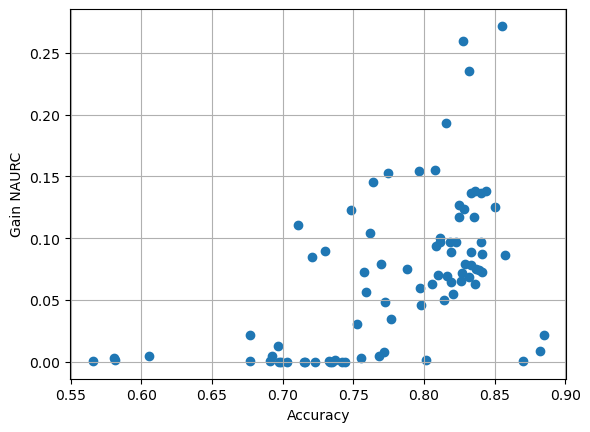

In [57]:
plt.scatter(acc_test.values(),gain_test)
#plt.plot([0,0.3],[0,0.3],'k--')
plt.xlabel('Accuracy')
plt.ylabel('Gain NAURC')
plt.grid()

In [210]:
m = np.where(np.isin(models_list,naurc_c_models))[0]
m = [49,79,0,1]

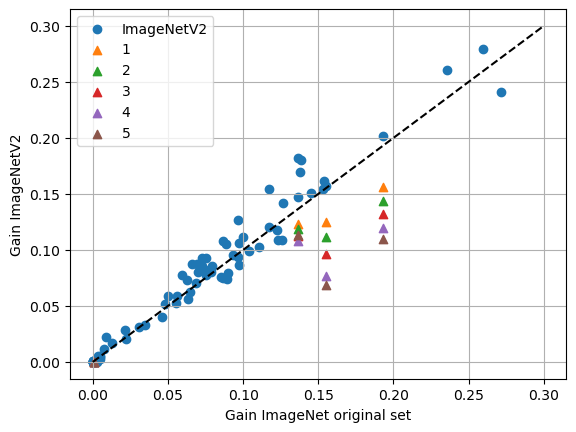

In [233]:
plt.scatter(gain_test,gain, label = 'ImageNetV2')
for l in range(5):
    plt.scatter(gain_test[m],(np.maximum(baseline_c-naurc_p_c,0)).mean(0)[l],marker = '^',label = l+1)
#for i,m in enumerate(naurc_c_models):
#    plt.scatter(gain_test[np.where(np.isin(models_list,m))[0].item()]*np.ones_like(gains_c.mean(0).T[i]),gains_c.mean(0).T[i])
plt.plot([0,0.3],[0,0.3],'k--')
plt.xlabel('Gain ImageNet original set')
plt.ylabel('Gain ImageNetV2')
plt.grid()
plt.legend()
plt.savefig(os.path.join(FIGS_PATH,'gains_v2.pdf'),format = 'pdf', bbox_inches='tight', transparent = True)
plt.show()

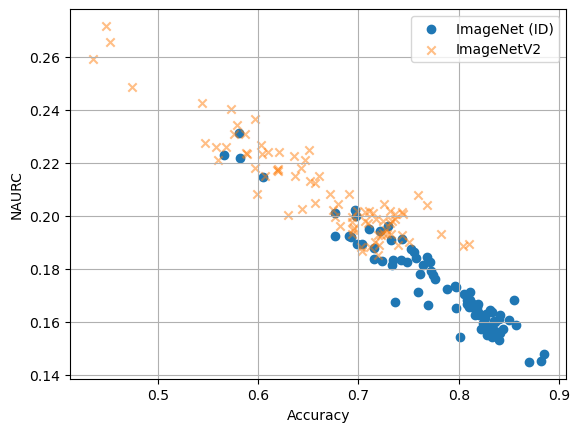

In [237]:
plt.scatter(acc_test.values(),d_optimal_naurc_test.values(),label = 'ImageNet (ID)')
plt.scatter(acc.values(),d_optimal_naurc.values(),label = 'ImageNetV2',marker = 'x', alpha = 0.5)

#for i in range(5):
#    plt.scatter(accs_c.mean(0)[i],naurc_p_c.mean(0)[i],marker = '^',label = f'ImageNet-C - {i+1}')

plt.grid()
plt.xlabel('Accuracy')
plt.ylabel('NAURC')
plt.legend()


plt.savefig(os.path.join(FIGS_PATH,'NAURC_v2.pdf'),format = 'pdf', bbox_inches='tight', transparent = True)

In [236]:
accs_c.mean(0)

array([[0.68574268, 0.70419068, 0.35166935, 0.74498934],
       [0.60037201, 0.62753868, 0.24482001, 0.68630668],
       [0.51856934, 0.55312667, 0.18090535, 0.63257334],
       [0.39440267, 0.43124402, 0.12450002, 0.52601734],
       [0.27096002, 0.29883068, 0.07868803, 0.38454401]])

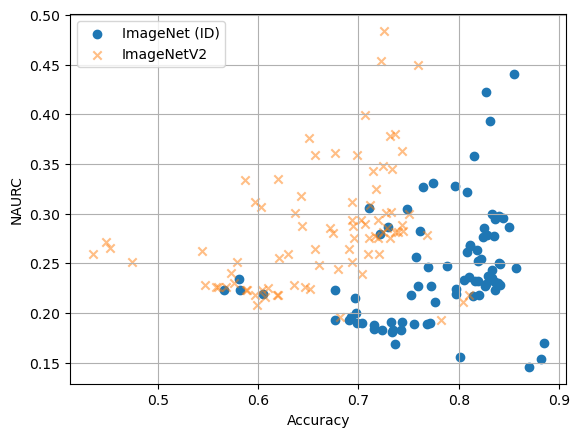

In [238]:
plt.scatter(acc_test.values(),baseline_naurc_test.values(),label = 'ImageNet (ID)')
plt.scatter(acc.values(),baseline_naurc.values(),label = 'ImageNetV2',marker = 'x', alpha = 0.5)

#for i in range(5):
#    plt.scatter(accs_c.mean(0)[i],baseline_c.mean(0)[i],marker = '^',label = f'ImageNet-C - {i+1}')

plt.grid()
plt.xlabel('Accuracy')
plt.ylabel('NAURC')
plt.legend()


plt.savefig(os.path.join(FIGS_PATH,'NAURC_v2_c_baseline.pdf'),format = 'pdf', bbox_inches='tight', transparent = True)

In [242]:
from scipy.stats import spearmanr

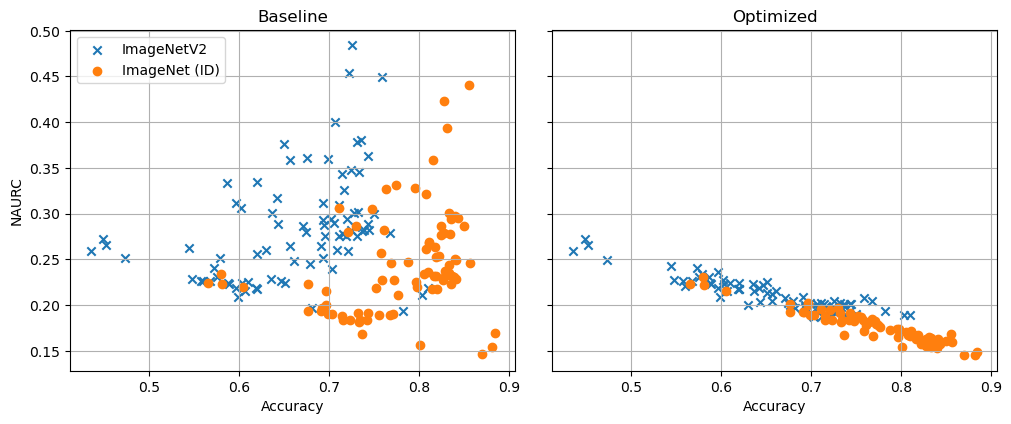

In [249]:
fig,axes = plt.subplots(1,2,figsize = (10,4), sharey = True)
fig.tight_layout()
scatter = axes[0].scatter(np.array(list(acc.values())),
                          np.array(list(baseline_naurc.values())),marker = 'x',label = 'ImageNetV2')
axes[0].scatter(acc_test.values(),d_naurc_test['MSP'].values(),label = 'ImageNet (ID)')
axes[1].scatter(acc.values(),d_optimal_naurc.values(),marker = 'x')
axes[1].scatter(acc_test.values(),d_optimal_naurc_test.values())
#for i in range(5):
#    axes[1].scatter(accs_c.mean(0)[i],naurc_p_c.mean(0)[i],marker = '^',label = i)
#    axes[0].scatter(accs_c.mean(0)[i],baseline_c.mean(0)[i],marker = '^',label = i)
axes[0].set_title(rf'Baseline')
axes[1].set_title(rf'Optimized')
axes[0].set_ylabel('NAURC')
for ax in axes:
    ax.grid()
    ax.set_xlabel('Accuracy')
axes[0].legend()

plt.savefig(os.path.join(FIGS_PATH,'NAURC_v2.pdf'),format = 'pdf', bbox_inches='tight', transparent = True)